In [1]:
#from bs4 import BeautifulSoup
#import requests
import pandas as pd
import numpy as np
import re
import math
import seaborn as sns
from matplotlib import pyplot as plt
from collections import defaultdict
#from IPython.core.display import display, HTML
import pickle
import copy
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import train_test_split
#display(HTML(my_html))     # make sure Jupyter knows to display it as HTML

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import OneHotEncoder

## Retrieve scraped data via pickle

In [2]:
director='herzog'
dir_str = director + '/'

pickled_film_catalog_filename = 'film_catalog_' + director +'.pickle'
pickled_box_office_filename = 'box_office_' + director +'.pickle'
pickled_fc_columns_filename = 'fc_cols_' + director +'.pickle'
pickled_dict_of_actors_filename = 'dict_of_actors_' + director +'.pickle'

#pickled_misc_vars_filename = 'misc_vars_' + director +'.pickle'

In [3]:
with open(dir_str + pickled_film_catalog_filename, 'rb') as read_file:
    film_catalog_cast_columns_reordered = pickle.load(read_file)

In [4]:
with open(dir_str + pickled_box_office_filename, 'rb') as read_file:
    box_office_df = pickle.load(read_file)

In [5]:
with open(dir_str + pickled_fc_columns_filename, 'rb') as read_file:
    film_catalog_columns = pickle.load(read_file)


In [6]:
with open(dir_str + pickled_dict_of_actors_filename, 'rb') as read_file:
    dict_of_all_actors  = pickle.load(read_file) 

In [7]:
first_cast_column = len(film_catalog_columns) - len(dict_of_all_actors)

### Merging, cleaning, wrangling

In [8]:
if(director != 'fassbinder'):
    films_df = pd.merge(film_catalog_cast_columns_reordered, box_office_df, how='outer', left_on='title', right_on='title')
else:
    films_df = film_catalog_cast_columns_reordered
    films_df['worldwide_gross_bo'] = np.nan

In [9]:
films_df.head(10)

,title,year,rating,rating_count,duration,release_date,metacritic_score,worldwide_gross_imdb,runtime,budget,...,David R. Pacheco Jr.,Regina Eisert,Olav T. Oftedal,Kevin Emery,Ryan Andrew Evans,Doug MacAyeal,Stefan Pashov,Scott Rowland,Reinhard Lichtenberg,worldwide_gross_bo
0,Fordlandia,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fireball: Visitors from Darker Worlds,2020.0,7.0,1439.0,97.0,13 November 2020 (Australia),72.0,NaN,97.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Family Romance, LLC",2019.0,6.7,1913.0,89.0,3 July 2020 (USA),68.0,3126.0,89.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nomad: In the Footsteps of Bruce Chatwin,2019.0,6.9,551.0,85.0,26 August 2020 (USA),85.0,78100.0,85.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Meeting Gorbachev,2018.0,7.2,1694.0,90.0,3 May 2019 (USA),73.0,319230.0,90.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327912.0
5,Into the Inferno,2016.0,7.2,7392.0,104.0,28 October 2016 (USA),76.0,3679.0,104.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4861.0
6,Salt and Fire,2016.0,4.2,2458.0,98.0,7 April 2017 (USA),44.0,23888.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Lo and Behold: Reveries of the Connected World,2016.0,7.0,11929.0,98.0,19 August 2016 (USA),76.0,765796.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Queen of the Desert,2015.0,5.7,10262.0,128.0,14 April 2017 (USA),39.0,1592853.0,128.0,15000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1578543.0
9,On Death Row,NaN,8.0,1090.0,49.0,9 March 2012 (USA),NaN,NaN,49.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
films_df.columns[:]


Index(['title', 'year', 'rating', 'rating_count', 'duration', 'release_date',
       'metacritic_score', 'worldwide_gross_imdb', 'runtime', 'budget',
       ...
       'David R. Pacheco Jr.', 'Regina Eisert', 'Olav T. Oftedal',
       'Kevin Emery', 'Ryan Andrew Evans', 'Doug MacAyeal', 'Stefan Pashov',
       'Scott Rowland', 'Reinhard Lichtenberg', 'worldwide_gross_bo'],
      dtype='object', length=566)

In [11]:
films_df.head()

,title,year,rating,rating_count,duration,release_date,metacritic_score,worldwide_gross_imdb,runtime,budget,...,David R. Pacheco Jr.,Regina Eisert,Olav T. Oftedal,Kevin Emery,Ryan Andrew Evans,Doug MacAyeal,Stefan Pashov,Scott Rowland,Reinhard Lichtenberg,worldwide_gross_bo
0,Fordlandia,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fireball: Visitors from Darker Worlds,2020.0,7.0,1439.0,97.0,13 November 2020 (Australia),72.0,NaN,97.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Family Romance, LLC",2019.0,6.7,1913.0,89.0,3 July 2020 (USA),68.0,3126.0,89.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nomad: In the Footsteps of Bruce Chatwin,2019.0,6.9,551.0,85.0,26 August 2020 (USA),85.0,78100.0,85.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Meeting Gorbachev,2018.0,7.2,1694.0,90.0,3 May 2019 (USA),73.0,319230.0,90.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327912.0


In [12]:
# these renamings are temporary
if('box_office' in films_df.columns):
    films_df.rename(columns={'box_office':'worldwide_gross_bo'}, inplace=True)
    films_df

In [13]:
# these renamings are temporary
if('worldwide_gross' in films_df.columns):
    films_df.rename(columns={'worldwide_gross':'worldwide_gross_imdb'}, inplace=True)

In [14]:
main_column_names_rearranged = ['title', 'year', 'release_date', 'duration', 'runtime', 'budget', 'worldwide_gross_imdb', 'worldwide_gross_bo', 'rating', 'metacritic_score', 'rating_count', 'tv_series', 'documentary','cinematographer']
cast_column_names= films_df.columns[first_cast_column:-1]

In [15]:
films_df.columns[:15]

Index(['title', 'year', 'rating', 'rating_count', 'duration', 'release_date',
       'metacritic_score', 'worldwide_gross_imdb', 'runtime', 'budget',
       'tv_series', 'documentary', 'cinematographer', 'Werner Herzog',
       'Klaus Kinski'],
      dtype='object')

In [16]:
#import copy


films_df_reordered=copy.deepcopy(films_df[[*main_column_names_rearranged, *cast_column_names] ] )                         
                            

In [17]:
films_df_reordered.head(10)

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,Samuel S. Bowser,David R. Pacheco Jr.,Regina Eisert,Olav T. Oftedal,Kevin Emery,Ryan Andrew Evans,Doug MacAyeal,Stefan Pashov,Scott Rowland,Reinhard Lichtenberg
0,Fordlandia,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fireball: Visitors from Darker Worlds,2020.0,13 November 2020 (Australia),97.0,97.0,NaN,NaN,NaN,7.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Family Romance, LLC",2019.0,3 July 2020 (USA),89.0,89.0,NaN,3126.0,NaN,6.7,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nomad: In the Footsteps of Bruce Chatwin,2019.0,26 August 2020 (USA),85.0,85.0,NaN,78100.0,NaN,6.9,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Meeting Gorbachev,2018.0,3 May 2019 (USA),90.0,90.0,NaN,319230.0,327912.0,7.2,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Into the Inferno,2016.0,28 October 2016 (USA),104.0,104.0,NaN,3679.0,4861.0,7.2,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Salt and Fire,2016.0,7 April 2017 (USA),98.0,98.0,NaN,23888.0,NaN,4.2,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Lo and Behold: Reveries of the Connected World,2016.0,19 August 2016 (USA),98.0,98.0,NaN,765796.0,NaN,7.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Queen of the Desert,2015.0,14 April 2017 (USA),128.0,128.0,15000000.0,1592853.0,1578543.0,5.7,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,On Death Row,NaN,9 March 2012 (USA),49.0,49.0,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
films_df_reordered.shape

(89, 566)

#### Clean up the `year` column

In [19]:
films_df_reordered['release_date'].fillna('', inplace=True)

In [20]:
films_df_reordered

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,Samuel S. Bowser,David R. Pacheco Jr.,Regina Eisert,Olav T. Oftedal,Kevin Emery,Ryan Andrew Evans,Doug MacAyeal,Stefan Pashov,Scott Rowland,Reinhard Lichtenberg
0,Fordlandia,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fireball: Visitors from Darker Worlds,2020.0,13 November 2020 (Australia),97.0,97.0,NaN,NaN,NaN,7.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Family Romance, LLC",2019.0,3 July 2020 (USA),89.0,89.0,NaN,3126.0,NaN,6.7,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nomad: In the Footsteps of Bruce Chatwin,2019.0,26 August 2020 (USA),85.0,85.0,NaN,78100.0,NaN,6.9,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Meeting Gorbachev,2018.0,3 May 2019 (USA),90.0,90.0,NaN,319230.0,327912.0,7.2,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Encounters at the End of th…,NaN,,NaN,NaN,NaN,NaN,1252613.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Mister Lonely,NaN,,NaN,NaN,NaN,NaN,165831.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,Aguirre: The Wrath of God,NaN,,NaN,NaN,NaN,NaN,12609.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Mein Liebster Feind,NaN,,NaN,NaN,NaN,NaN,574490.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
flix_to_clean_yr = (np.isnan(films_df_reordered['year'])) & (films_df_reordered['release_date']!='') & (films_df_reordered['release_date']!= 'NaN')

In [22]:
#films_df_reordered.loc[films_df_reordered[flix_to_clean_yr ], 'years'] = films_df_reordered.loc[films_df_reordered[flix_to_clean_yr ], 'years']

In [23]:
# use the release_date column where possible to set missing values in the year column
#films_df_reordered['year']=films_df_reordered.apply(lambda row: float((re.search(r'\d{4}', row['release_date'])).group()) if (np.isnan(row['year']) & (row['release_date']!='') & (row['release_date']!='NaN') ) else row['year'], axis=1)

cleaned_yrs = films_df_reordered.apply(lambda row: float((re.search(r'\d{4}', row['release_date'])).group()) if (np.isnan(row['year']) & (row['release_date']!='') & (row['release_date']!='NaN') ) else row['year'], axis=1)
films_df_reordered.loc[:, 'year'] = cleaned_yrs


In [24]:
films_df_reordered.tail(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,Samuel S. Bowser,David R. Pacheco Jr.,Regina Eisert,Olav T. Oftedal,Kevin Emery,Ryan Andrew Evans,Doug MacAyeal,Stefan Pashov,Scott Rowland,Reinhard Lichtenberg
39,Cerro Torre: Schrei aus Stein,1991.0,3 October 1991 (Germany),105.0,105.0,6340000.0,NaN,NaN,6.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Echoes From a Somber Empire,1990.0,28 November 1990 (France),91.0,NaN,NaN,NaN,NaN,7.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Giovanna d'Arco,1989.0,,127.0,127.0,NaN,NaN,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Wodaabe - Die Hirten der Sonne. Nomaden am Süd...,1989.0,12 June 1989 (West Germany),52.0,NaN,NaN,NaN,NaN,7.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Les Français vus par,1988.0,1988 (France),13.0,13.0,NaN,NaN,NaN,6.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Cobra Verde,1987.0,3 December 1987 (West Germany),111.0,111.0,800000.0,12702.0,7402.0,7.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Werner Herzog: Filmemacher,1986.0,1986 (West Germany),28.0,28.0,NaN,NaN,NaN,6.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Gasherbrum - Der leuchtende Berg,1985.0,3 April 1985 (USA),45.0,45.0,NaN,NaN,NaN,7.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Ballade vom kleinen Soldaten,1984.0,3 April 1985 (USA),46.0,NaN,NaN,NaN,NaN,7.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Where the Green Ants Dream,1984.0,8 February 1985 (USA),100.0,100.0,NaN,NaN,NaN,7.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Clean up the `duration` column

In [25]:
films_df_reordered['duration']=films_df_reordered.apply(lambda row: row['runtime'] if (np.isnan(row['duration']) ) else row['duration'], axis=1)

#### Clean up the `bo_worldwide_gross` column

In [26]:
films_df_reordered['worldwide_gross'] = films_df_reordered.apply(lambda row: float(row['worldwide_gross_bo']) if (pd.notna(row['worldwide_gross_bo'])) & (row['worldwide_gross_bo']!='' ) else row['worldwide_gross_imdb'], axis=1)

In [27]:
films_df_reordered.head(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,David R. Pacheco Jr.,Regina Eisert,Olav T. Oftedal,Kevin Emery,Ryan Andrew Evans,Doug MacAyeal,Stefan Pashov,Scott Rowland,Reinhard Lichtenberg,worldwide_gross
0,Fordlandia,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fireball: Visitors from Darker Worlds,2020.0,13 November 2020 (Australia),97.0,97.0,NaN,NaN,NaN,7.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Family Romance, LLC",2019.0,3 July 2020 (USA),89.0,89.0,NaN,3126.0,NaN,6.7,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3126.0
3,Nomad: In the Footsteps of Bruce Chatwin,2019.0,26 August 2020 (USA),85.0,85.0,NaN,78100.0,NaN,6.9,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78100.0
4,Meeting Gorbachev,2018.0,3 May 2019 (USA),90.0,90.0,NaN,319230.0,327912.0,7.2,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327912.0
5,Into the Inferno,2016.0,28 October 2016 (USA),104.0,104.0,NaN,3679.0,4861.0,7.2,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4861.0
6,Salt and Fire,2016.0,7 April 2017 (USA),98.0,98.0,NaN,23888.0,NaN,4.2,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23888.0
7,Lo and Behold: Reveries of the Connected World,2016.0,19 August 2016 (USA),98.0,98.0,NaN,765796.0,NaN,7.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,765796.0
8,Queen of the Desert,2015.0,14 April 2017 (USA),128.0,128.0,15000000.0,1592853.0,1578543.0,5.7,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1578543.0
9,On Death Row,2012.0,9 March 2012 (USA),49.0,49.0,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
films_df_reordered.columns[350:710]

Index(['Reggie Shaw', 'Megan O'Dell', 'Karl', 'Elizabeth Brigante',
       'Debbie Drewniak', 'Diosdado Hernandez', 'Chandler Gerber',
       'Aurie Parris', 'Xzavier Davis-Bilbo', 'Valetta Bradford',
       ...
       'David R. Pacheco Jr.', 'Regina Eisert', 'Olav T. Oftedal',
       'Kevin Emery', 'Ryan Andrew Evans', 'Doug MacAyeal', 'Stefan Pashov',
       'Scott Rowland', 'Reinhard Lichtenberg', 'worldwide_gross'],
      dtype='object', length=217)

#### Remove rows with too many missing values

In [29]:
films_df_reordered.shape

(89, 567)

In [30]:

n=films_df_reordered.iloc[:, :first_cast_column].notna()
n.sum(axis=1).head(50)


0      4
1     10
2     11
3     11
4     12
5     12
6     11
7     11
8     13
9      9
10     9
11     9
12    12
13     9
14    11
15    12
16    12
17     9
18    12
19    11
20    13
21    11
22    12
23    11
24    10
25    10
26     8
27    12
28     9
29     9
30    10
31     9
32     8
33     8
34     8
35     9
36     9
37     7
38     9
39    10
40     8
41     9
42     8
43     9
44    13
45     9
46     9
47     8
48     9
49    10
dtype: int64

In [31]:
first_cast_column

13

In [32]:
thresh=.4
thresh*first_cast_column

5.2

In [33]:
films_df_reordered.loc[n.sum(axis=1) >= thresh*first_cast_column]

,title,year,release_date,duration,runtime,budget,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,...,David R. Pacheco Jr.,Regina Eisert,Olav T. Oftedal,Kevin Emery,Ryan Andrew Evans,Doug MacAyeal,Stefan Pashov,Scott Rowland,Reinhard Lichtenberg,worldwide_gross
1,Fireball: Visitors from Darker Worlds,2020.0,13 November 2020 (Australia),97.0,97.0,NaN,NaN,NaN,7.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Family Romance, LLC",2019.0,3 July 2020 (USA),89.0,89.0,NaN,3126.0,NaN,6.7,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3126.0
3,Nomad: In the Footsteps of Bruce Chatwin,2019.0,26 August 2020 (USA),85.0,85.0,NaN,78100.0,NaN,6.9,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78100.0
4,Meeting Gorbachev,2018.0,3 May 2019 (USA),90.0,90.0,NaN,319230.0,327912.0,7.2,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327912.0
5,Into the Inferno,2016.0,28 October 2016 (USA),104.0,104.0,NaN,3679.0,4861.0,7.2,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4861.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Lebenszeichen,1968.0,9 December 1981 (USA),91.0,95.0,25000.0,NaN,NaN,7.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Letzte Worte,1968.0,26 November 1976 (USA),13.0,13.0,NaN,NaN,NaN,6.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Die beispiellose Verteidigung der Festung Deut...,1967.0,1967 (West Germany),15.0,15.0,NaN,NaN,NaN,5.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Spiel im Sand,1964.0,,14.0,NaN,NaN,NaN,NaN,7.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#films_df_reordered.iloc[70, :].head(30)

In [35]:
films_df_reordered.columns

Index(['title', 'year', 'release_date', 'duration', 'runtime', 'budget',
       'worldwide_gross_imdb', 'worldwide_gross_bo', 'rating',
       'metacritic_score',
       ...
       'David R. Pacheco Jr.', 'Regina Eisert', 'Olav T. Oftedal',
       'Kevin Emery', 'Ryan Andrew Evans', 'Doug MacAyeal', 'Stefan Pashov',
       'Scott Rowland', 'Reinhard Lichtenberg', 'worldwide_gross'],
      dtype='object', length=567)

In [36]:


films_df_reordered = films_df_reordered.loc[n.sum(axis=1) >= thresh*first_cast_column, :] 

In [37]:
films_df_reordered.shape

(72, 567)

#### Cleap up the ordering of columns

In [38]:
main_column_names_rearranged = ['title', 'year', 'release_date', 'duration', 'runtime', 'budget', 'worldwide_gross','worldwide_gross_imdb', 'worldwide_gross_bo', 'rating', 'metacritic_score', 'rating_count', 'tv_series', 'documentary','cinematographer']
cast_column_names= films_df.columns[first_cast_column:-1]

In [39]:
films_df_reordered=films_df_reordered[[*main_column_names_rearranged, *cast_column_names] ] 

In [40]:
films_df_reordered.columns[:20]

Index(['title', 'year', 'release_date', 'duration', 'runtime', 'budget',
       'worldwide_gross', 'worldwide_gross_imdb', 'worldwide_gross_bo',
       'rating', 'metacritic_score', 'rating_count', 'tv_series',
       'documentary', 'cinematographer', 'Werner Herzog', 'Klaus Kinski',
       'Volker Prechtel', 'Brad Dourif', 'Wolfgang von Ungern-Sternberg'],
      dtype='object')

In [41]:
films_df_reordered.columns[20:85]

Index(['Paul Hittscher', 'Peter Berling', 'Clemens Scheitz', 'Michael Shannon',
       'Eva Mattes', 'Chloë Sevigny', 'Reinhold Messner', 'José Lewgoy',
       'Stefan Glowacz', 'Henry van Lyck', 'Willy Semmelrogge', 'Bruno S.',
       'Josef Bierbichler', 'Rolf Illig', 'Scott McKain', 'Ralph Wade',
       'Hans Kammerlander', 'Claudia Cardinale', 'Mick Jagger', 'Lotte Eisner',
       'Helmut Döring', 'Irma P. Hall', 'Walter Ladengast', 'Udo Kier',
       'Clive Oppenheimer', 'Beat Presser', 'Wolfgang Reichmann',
       'Rick Guillory', 'Magali Alvarado', 'Eddy Dixon', 'Marie Laurin',
       'Patrick Houser', 'Ann Sophie', 'Robyn Sumners', 'Frederic Golchan',
       'Michael Horse', 'Tracey Walter', 'Jack Nance', 'Leslie Cook',
       'Harry Dean Stanton', 'Pietro Spagnoli', 'Réal Giguère',
       'Vincenzo La Scola', 'Susan Dunn', 'Renato Bruson',
       'Jean-Bédel Bokassa', 'Marie-Reine Hassen', 'François Gibault',
       'Kathy Dean', 'Amanda Hull', 'Manette LaChance', 'Nana Fedu A

In [42]:
films_df_reordered.sort_values(by='title').tail(40)

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,Samuel S. Bowser,David R. Pacheco Jr.,Regina Eisert,Olav T. Oftedal,Kevin Emery,Ryan Andrew Evans,Doug MacAyeal,Stefan Pashov,Scott Rowland,Reinhard Lichtenberg
12,Into the Abyss,2011.0,30 March 2012 (UK),107.0,107.0,NaN,550645.0,393714.0,550645.0,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Into the Inferno,2016.0,28 October 2016 (USA),104.0,104.0,NaN,4861.0,3679.0,4861.0,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Invincible,2001.0,17 January 2002 (Germany),133.0,133.0,NaN,80636.0,180616.0,80636.0,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Jag Mandir: Das exzentrische Privattheater des...,1991.0,10 November 1991 (Germany),82.0,82.0,NaN,NaN,NaN,NaN,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Julianes Sturz in den Dschungel,1999.0,1 February 2000 (Germany),65.0,65.0,NaN,NaN,NaN,NaN,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,La Bohème,2009.0,5 September 2009 (Italy),4.0,4.0,NaN,NaN,NaN,NaN,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,La Soufrière - Warten auf eine unausweichliche...,1977.0,3 December 2014 (France),30.0,NaN,NaN,NaN,NaN,NaN,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,Land of Silence and Darkness,1971.0,22 October 2002 (Hong Kong),85.0,85.0,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Lebenszeichen,1968.0,9 December 1981 (USA),91.0,95.0,25000.0,NaN,NaN,NaN,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Lektionen in Finsternis,1992.0,26 October 2002 (Hong Kong),54.0,54.0,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### In cast columns, replace NaN with zero

In [43]:
#first_cast_column = len(films_df_reordered.columns[15:])

In [44]:
#first_cast_column = len(films_df_reordered.columns) - len(dict_of_all_actors)

In [45]:
films_df_reordered.head(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,Samuel S. Bowser,David R. Pacheco Jr.,Regina Eisert,Olav T. Oftedal,Kevin Emery,Ryan Andrew Evans,Doug MacAyeal,Stefan Pashov,Scott Rowland,Reinhard Lichtenberg
1,Fireball: Visitors from Darker Worlds,2020.0,13 November 2020 (Australia),97.0,97.0,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Family Romance, LLC",2019.0,3 July 2020 (USA),89.0,89.0,NaN,3126.0,3126.0,NaN,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nomad: In the Footsteps of Bruce Chatwin,2019.0,26 August 2020 (USA),85.0,85.0,NaN,78100.0,78100.0,NaN,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Meeting Gorbachev,2018.0,3 May 2019 (USA),90.0,90.0,NaN,327912.0,319230.0,327912.0,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Into the Inferno,2016.0,28 October 2016 (USA),104.0,104.0,NaN,4861.0,3679.0,4861.0,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Salt and Fire,2016.0,7 April 2017 (USA),98.0,98.0,NaN,23888.0,23888.0,NaN,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Lo and Behold: Reveries of the Connected World,2016.0,19 August 2016 (USA),98.0,98.0,NaN,765796.0,765796.0,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Queen of the Desert,2015.0,14 April 2017 (USA),128.0,128.0,15000000.0,1578543.0,1592853.0,1578543.0,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,On Death Row,2012.0,9 March 2012 (USA),49.0,49.0,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,From One Second to the Next,2013.0,7 August 2013 (USA),34.0,34.0,NaN,NaN,NaN,NaN,7.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
films_df_reordered.iloc[:, first_cast_column:]=films_df_reordered.iloc[:, first_cast_column:].replace(np.nan, 0)

In [47]:
films_df_reordered.iloc[:, first_cast_column:].sum()

documentary                                                          42.0
cinematographer         Peter ZeitlingerWerner HerzogLouis CaulfieldYu...
Werner Herzog                                                        29.0
Klaus Kinski                                                          7.0
Volker Prechtel                                                       4.0
                                              ...                        
Ryan Andrew Evans                                                     1.0
Doug MacAyeal                                                         1.0
Stefan Pashov                                                         1.0
Scott Rowland                                                         1.0
Reinhard Lichtenberg                                                  1.0
Length: 554, dtype: object

In [48]:
films_df_reordered.head(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,Samuel S. Bowser,David R. Pacheco Jr.,Regina Eisert,Olav T. Oftedal,Kevin Emery,Ryan Andrew Evans,Doug MacAyeal,Stefan Pashov,Scott Rowland,Reinhard Lichtenberg
1,Fireball: Visitors from Darker Worlds,2020.0,13 November 2020 (Australia),97.0,97.0,NaN,NaN,NaN,NaN,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Family Romance, LLC",2019.0,3 July 2020 (USA),89.0,89.0,NaN,3126.0,3126.0,NaN,6.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Nomad: In the Footsteps of Bruce Chatwin,2019.0,26 August 2020 (USA),85.0,85.0,NaN,78100.0,78100.0,NaN,6.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Meeting Gorbachev,2018.0,3 May 2019 (USA),90.0,90.0,NaN,327912.0,319230.0,327912.0,7.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Into the Inferno,2016.0,28 October 2016 (USA),104.0,104.0,NaN,4861.0,3679.0,4861.0,7.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Salt and Fire,2016.0,7 April 2017 (USA),98.0,98.0,NaN,23888.0,23888.0,NaN,4.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Lo and Behold: Reveries of the Connected World,2016.0,19 August 2016 (USA),98.0,98.0,NaN,765796.0,765796.0,NaN,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Queen of the Desert,2015.0,14 April 2017 (USA),128.0,128.0,15000000.0,1578543.0,1592853.0,1578543.0,5.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,On Death Row,2012.0,9 March 2012 (USA),49.0,49.0,NaN,NaN,NaN,NaN,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,From One Second to the Next,2013.0,7 August 2013 (USA),34.0,34.0,NaN,NaN,NaN,NaN,7.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
films_df_reordered.dtypes[:15]

title                    object
year                    float64
release_date             object
duration                float64
runtime                 float64
budget                  float64
worldwide_gross         float64
worldwide_gross_imdb    float64
worldwide_gross_bo       object
rating                  float64
metacritic_score        float64
rating_count            float64
tv_series               float64
documentary             float64
cinematographer          object
dtype: object

In [50]:
films_df_reordered.iloc[:, :first_cast_column].head(50)

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,rating_count,tv_series
1,Fireball: Visitors from Darker Worlds,2020.0,13 November 2020 (Australia),97.0,97.0,NaN,NaN,NaN,NaN,7.0,72.0,1439.0,0.0
2,"Family Romance, LLC",2019.0,3 July 2020 (USA),89.0,89.0,NaN,3126.0,3126.0,NaN,6.7,68.0,1913.0,0.0
3,Nomad: In the Footsteps of Bruce Chatwin,2019.0,26 August 2020 (USA),85.0,85.0,NaN,78100.0,78100.0,NaN,6.9,85.0,551.0,0.0
4,Meeting Gorbachev,2018.0,3 May 2019 (USA),90.0,90.0,NaN,327912.0,319230.0,327912.0,7.2,73.0,1694.0,0.0
5,Into the Inferno,2016.0,28 October 2016 (USA),104.0,104.0,NaN,4861.0,3679.0,4861.0,7.2,76.0,7392.0,0.0
6,Salt and Fire,2016.0,7 April 2017 (USA),98.0,98.0,NaN,23888.0,23888.0,NaN,4.2,44.0,2458.0,0.0
7,Lo and Behold: Reveries of the Connected World,2016.0,19 August 2016 (USA),98.0,98.0,NaN,765796.0,765796.0,NaN,7.0,76.0,11929.0,0.0
8,Queen of the Desert,2015.0,14 April 2017 (USA),128.0,128.0,15000000.0,1578543.0,1592853.0,1578543.0,5.7,39.0,10262.0,0.0
9,On Death Row,2012.0,9 March 2012 (USA),49.0,49.0,NaN,NaN,NaN,NaN,8.0,NaN,1090.0,1.0
10,From One Second to the Next,2013.0,7 August 2013 (USA),34.0,34.0,NaN,NaN,NaN,NaN,7.4,NaN,1169.0,0.0


In [51]:
films_df_reordered["worldwide_gross"] = pd.to_numeric(films_df_reordered["worldwide_gross"])

In [52]:
films_df_reordered.iloc[:,:first_cast_column].corr()

,year,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,rating,metacritic_score,rating_count,tv_series
year,1.000000,0.352919,0.284334,0.691204,0.219504,0.218058,-0.052521,-0.007122,0.120876,-0.132903
duration,0.352919,1.000000,0.999793,0.636370,0.134380,0.158772,0.231268,-0.369231,0.429694,-0.230291
runtime,0.284334,0.999793,1.000000,0.626067,0.134380,0.158772,0.251575,-0.372025,0.419163,-0.267175
budget,0.691204,0.636370,0.626067,1.000000,0.845670,0.842487,-0.464799,-0.128562,0.592217,-0.266838
worldwide_gross,0.219504,0.134380,0.134380,0.845670,1.000000,0.997248,0.046984,0.305752,0.660204,NaN
worldwide_gross_imdb,0.218058,0.158772,0.158772,0.842487,0.997248,1.000000,0.034584,0.282772,0.690002,NaN
rating,-0.052521,0.231268,0.251575,-0.464799,0.046984,0.034584,1.000000,0.786537,0.222964,-0.030162
metacritic_score,-0.007122,-0.369231,-0.372025,-0.128562,0.305752,0.282772,0.786537,1.000000,0.256825,NaN
rating_count,0.120876,0.429694,0.419163,0.592217,0.660204,0.690002,0.222964,0.256825,1.000000,-0.253281
tv_series,-0.132903,-0.230291,-0.267175,-0.266838,NaN,NaN,-0.030162,NaN,-0.253281,1.000000


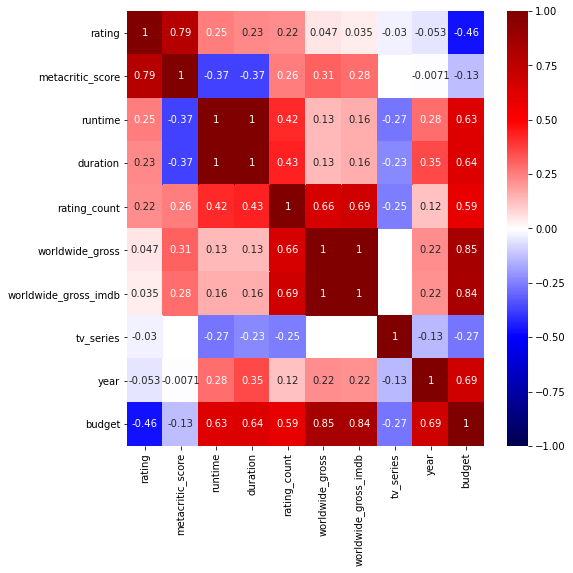

In [53]:
ix = films_df_reordered.iloc[:,:first_cast_column].corr().sort_values('rating', ascending=False).index
films_df_reordered_sorted = films_df_reordered.loc[:, ix]
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(films_df_reordered_sorted.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, ax=ax);

In [54]:
#sns.heatmap(films_df_reordered.iloc[:,:first_cast_column].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

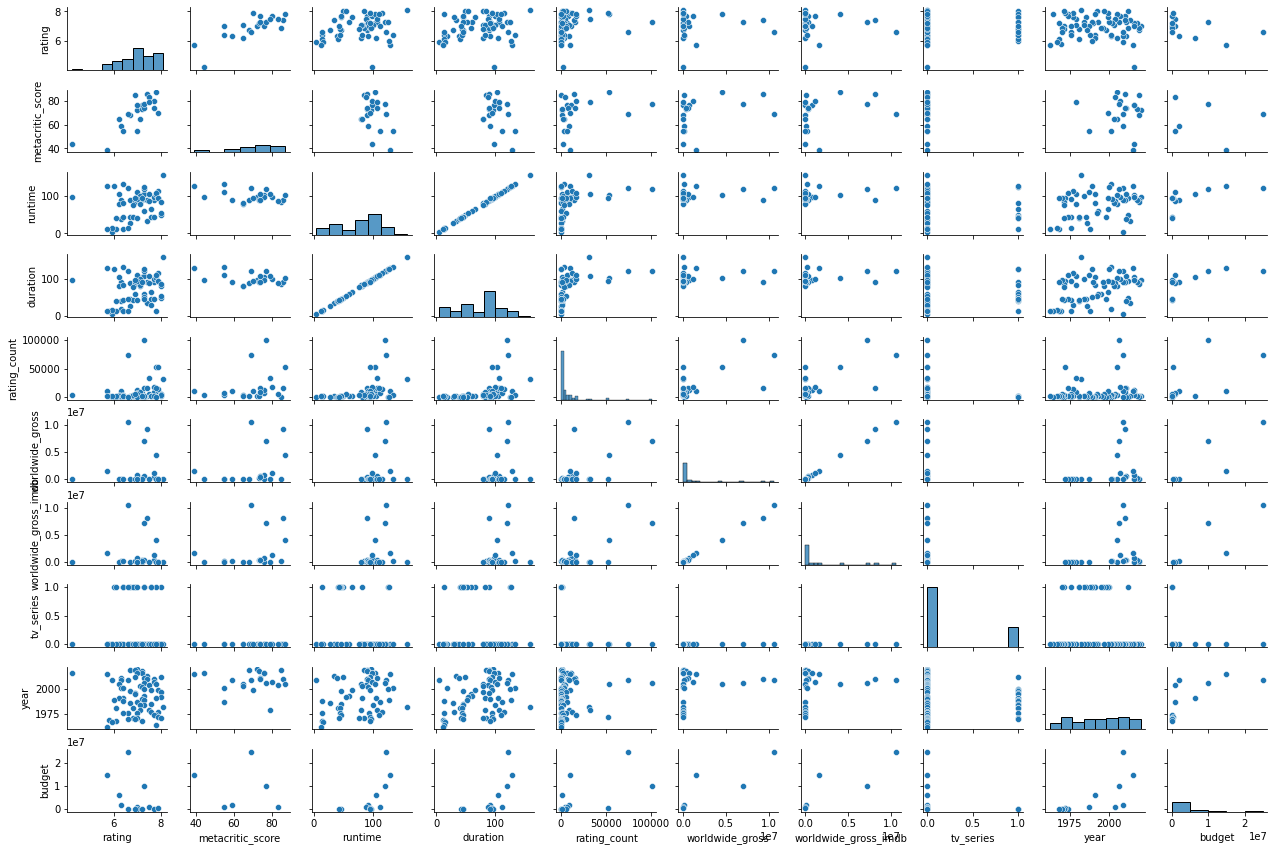

In [55]:
sns.pairplot(films_df_reordered_sorted.iloc[:,:first_cast_column], height=1.2, aspect=1.5);

#### Determine which columns have enough non-null values so they could be used

In [56]:
films_df_reordered['worldwide_gross'].value_counts(dropna=False)

NaN           47
2874.0         5
80636.0        1
37041.0        1
338987.0       1
1205464.0      1
765796.0       1
1578543.0      1
10606422.0     1
6970.0         1
76739.0        1
550645.0       1
9369629.0      1
23888.0        1
3126.0         1
4504451.0      1
7402.0         1
4861.0         1
7037886.0      1
327912.0       1
62221.0        1
78100.0        1
Name: worldwide_gross, dtype: int64

In [57]:
films_to_analyze=films_df_reordered[(films_df_reordered['year'].notnull()) & (films_df_reordered['duration']>30) & (films_df_reordered['rating'].notnull()) & (films_df_reordered['cinematographer']!='') & (films_df_reordered['cinematographer'].notnull())]
films_to_analyze.iloc[:,5:15].head(10)


,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,rating_count,tv_series,documentary,cinematographer
1,NaN,NaN,NaN,NaN,7.0,72.0,1439.0,0.0,1.0,Peter Zeitlinger
2,NaN,3126.0,3126.0,NaN,6.7,68.0,1913.0,0.0,0.0,Werner Herzog
3,NaN,78100.0,78100.0,NaN,6.9,85.0,551.0,0.0,1.0,Louis Caulfield
4,NaN,327912.0,319230.0,327912.0,7.2,73.0,1694.0,0.0,1.0,Yuri Burak
5,NaN,4861.0,3679.0,4861.0,7.2,76.0,7392.0,0.0,1.0,Peter Zeitlinger
6,NaN,23888.0,23888.0,NaN,4.2,44.0,2458.0,0.0,0.0,Peter Zeitlinger
7,NaN,765796.0,765796.0,NaN,7.0,76.0,11929.0,0.0,1.0,Peter Zeitlinger
8,15000000.0,1578543.0,1592853.0,1578543.0,5.7,39.0,10262.0,0.0,0.0,Peter Zeitlinger
9,NaN,NaN,NaN,NaN,8.0,NaN,1090.0,1.0,1.0,Peter Zeitlinger
10,NaN,NaN,NaN,NaN,7.4,NaN,1169.0,0.0,1.0,Peter Zeitlinger


In [58]:
first_actor_column = (len(films_to_analyze.columns) - len(dict_of_all_actors))
first_actor_column

15

In [59]:
actor_columns = films_to_analyze.iloc[:, first_actor_column:].columns
actor_columns

Index(['Werner Herzog', 'Klaus Kinski', 'Volker Prechtel', 'Brad Dourif',
       'Wolfgang von Ungern-Sternberg', 'Paul Hittscher', 'Peter Berling',
       'Clemens Scheitz', 'Michael Shannon', 'Eva Mattes',
       ...
       'Samuel S. Bowser', 'David R. Pacheco Jr.', 'Regina Eisert',
       'Olav T. Oftedal', 'Kevin Emery', 'Ryan Andrew Evans', 'Doug MacAyeal',
       'Stefan Pashov', 'Scott Rowland', 'Reinhard Lichtenberg'],
      dtype='object', length=552)

In [60]:
films_to_analyze[actor_columns].sum()

Werner Herzog                    26.0
Klaus Kinski                      6.0
Volker Prechtel                   4.0
Brad Dourif                       4.0
Wolfgang von Ungern-Sternberg     2.0
                                 ... 
Ryan Andrew Evans                 1.0
Doug MacAyeal                     1.0
Stefan Pashov                     1.0
Scott Rowland                     1.0
Reinhard Lichtenberg              0.0
Length: 552, dtype: float64

In [61]:
actors_num_of_appearances = films_to_analyze[actor_columns].sum()
actors_num_of_appearances

Werner Herzog                    26.0
Klaus Kinski                      6.0
Volker Prechtel                   4.0
Brad Dourif                       4.0
Wolfgang von Ungern-Sternberg     2.0
                                 ... 
Ryan Andrew Evans                 1.0
Doug MacAyeal                     1.0
Stefan Pashov                     1.0
Scott Rowland                     1.0
Reinhard Lichtenberg              0.0
Length: 552, dtype: float64

In [62]:
appearances_threshold = 3
prevalent_actors_mask = (actors_num_of_appearances >= appearances_threshold)
prevalent_actors_mask

Werner Herzog                     True
Klaus Kinski                      True
Volker Prechtel                   True
Brad Dourif                       True
Wolfgang von Ungern-Sternberg    False
                                 ...  
Ryan Andrew Evans                False
Doug MacAyeal                    False
Stefan Pashov                    False
Scott Rowland                    False
Reinhard Lichtenberg             False
Length: 552, dtype: bool

In [63]:
prevalent_actor_columns = actor_columns[prevalent_actors_mask]
prevalent_actor_columns 

Index(['Werner Herzog', 'Klaus Kinski', 'Volker Prechtel', 'Brad Dourif',
       'Peter Berling', 'Clemens Scheitz', 'Michael Shannon', 'Eva Mattes'],
      dtype='object')

In [64]:
films_filename = 'films_to_analyze_'+ director 
with open(dir_str + films_filename, 'wb') as to_write:
    pickle.dump(films_to_analyze, to_write)

In [65]:
prevalent_actors_filename = 'prevalent_actors_' + director
with open(dir_str + prevalent_actors_filename, 'wb') as to_write:
    pickle.dump(prevalent_actor_columns, to_write)

#### These next few cells are legacy  -----------------------------------------

In [66]:
films_to_analyze.iloc[:, 4:18].head()

,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,metacritic_score,rating_count,tv_series,documentary,cinematographer,Werner Herzog,Klaus Kinski,Volker Prechtel
1,97.0,NaN,NaN,NaN,NaN,7.0,72.0,1439.0,0.0,1.0,Peter Zeitlinger,1.0,0.0,0.0
2,89.0,NaN,3126.0,3126.0,NaN,6.7,68.0,1913.0,0.0,0.0,Werner Herzog,0.0,0.0,0.0
3,85.0,NaN,78100.0,78100.0,NaN,6.9,85.0,551.0,0.0,1.0,Louis Caulfield,1.0,0.0,0.0
4,90.0,NaN,327912.0,319230.0,327912.0,7.2,73.0,1694.0,0.0,1.0,Yuri Burak,1.0,0.0,0.0
5,104.0,NaN,4861.0,3679.0,4861.0,7.2,76.0,7392.0,0.0,1.0,Peter Zeitlinger,1.0,0.0,0.0


#### End of legacy code  -----------------------------------------

### EDA and Linear Regression